## 数据预处理

#### 读取数据

In [15]:
import pandas as pd
import numpy as np

# 读取数据
data_titleInfo = pd.read_csv('./Data_TitleInfo.csv')
data_studentInfo = pd.read_csv('./Data_StudentInfo.csv')

# data_submitRecords = [pd.read_csv('../dataset/Data_SubmitRecord/SubmitRecord-Class%d.csv' % i) for i in range(1, 16)]
# for i in range(1, 16):
#     data_submitRecords[i-1]['class'] = f'Class{i}'
# # 合并submitRecords
# data_submitRecords = pd.concat(data_submitRecords)
# data_submitRecords = data_submitRecords.reset_index(drop=True)
# # 把数据中的index列改为index
# data_submitRecords.replace('--', 0, inplace=True)
# data_submitRecords.replace('-', 0, inplace=True)
# data_submitRecords['state'].replace('�������', 'Error10', inplace=True)
# data_submitRecords['timeconsume'] = data_submitRecords['timeconsume'].astype('int64')
# data_submitRecords.to_csv('data_submitRecords.csv', index=False)
data_submitRecords = pd.read_csv('./Data_SubmitRecord_2024Spring.csv')
data_submitRecords['time'] = pd.to_datetime(data_submitRecords['time'])

In [16]:
data_submitRecords.head()

,index,class,time,state,score,title_ID,method,memory,timeconsume,student_ID
0,383951,Class_523,2024-02-21 23:01:00,Runtime Error,0,Question_1088,Method_C++,12832,655,523031910726_luliming
1,383957,Class_523,2024-02-21 23:06:21,Time Limit Exceeded,0,Question_1088,Method_C++,12904,5301,523031910726_luliming
2,383958,Class_523,2024-02-21 23:07:38,Wrong Answer,0,Question_1088,Method_C++,12908,5298,523031910726_luliming
3,383962,Class_523,2024-02-21 23:11:14,Time Limit Exceeded,0,Question_1088,Method_C++,13044,5298,523031910726_luliming
4,383965,Class_523,2024-02-21 23:13:17,Wrong Answer,0,Question_1088,Method_C++,13036,5240,523031910726_luliming


#### 生成题目数据特征

In [17]:
data_submitRecords.columns

Index(['index', 'class', 'time', 'state', 'score', 'title_ID', 'method',
       'memory', 'timeconsume', 'student_ID'],
      dtype='object')

In [18]:
# title 汇总信息
title_all_df = pd.DataFrame()
title_all_df['title_ID'] = data_titleInfo.groupby('title_ID')['title_ID'].max().values
title_all_df['score'] = data_titleInfo.groupby('title_ID')['score'].max().values
title_all_df['knowledge'] = data_titleInfo.groupby('title_ID')['knowledge'].aggregate(lambda x: ' '.join(x.tolist())).values
title_all_df['sub_knowledge'] = data_titleInfo.groupby('title_ID')['sub_knowledge'].aggregate(lambda x: ' '.join(x.tolist())).values
title_all_df['knowledge_num'] = data_titleInfo.groupby('title_ID')['knowledge'].count().values
title_all_df['sub_knowledge_num'] = data_titleInfo.groupby('title_ID')['sub_knowledge'].count().values
title_all_df['t_sbmnum'] = data_submitRecords.groupby('title_ID')['title_ID'].count().values
title_all_df['t_mean_sbmnum'] = title_all_df['t_sbmnum'] / [(data_submitRecords[data_submitRecords['title_ID'] == title_id]).groupby('student_ID')['student_ID'].count().values.shape[0] for title_id in title_all_df['title_ID']]
title_all_df['t_mean_score'] = data_submitRecords.groupby('title_ID')['score'].mean().values / title_all_df['score'] * 100
title_all_df['t_mean_pfm_mem'] = (data_submitRecords[data_submitRecords['memory'] != 0]).groupby('title_ID')['memory'].mean().values
title_all_df['t_max_pfm_mem'] = (data_submitRecords[data_submitRecords['memory'] != 0]).groupby('title_ID')['memory'].max().values
title_all_df['t_min_pfm_mem'] = (data_submitRecords[data_submitRecords['memory'] != 0]).groupby('title_ID')['memory'].min().values
title_all_df['t_mean_pfm_tc'] = (data_submitRecords[data_submitRecords['timeconsume'] != 0]).groupby('title_ID')['timeconsume'].mean().values
title_all_df['t_max_pfm_tc'] = (data_submitRecords[data_submitRecords['timeconsume'] != 0]).groupby('title_ID')['timeconsume'].max().values
title_all_df['t_min_pfm_tc'] = (data_submitRecords[data_submitRecords['timeconsume'] != 0]).groupby('title_ID')['timeconsume'].min().values
title_all_df['t_subtime_f'] = data_submitRecords.groupby('title_ID')['time'].min().values.astype('datetime64[s]')
title_all_df['t_subtime_l'] = data_submitRecords.groupby('title_ID')['time'].max().values.astype('datetime64[s]')
title_all_df['t_period'] = title_all_df['t_subtime_l'] - title_all_df['t_subtime_f']
title_all_df['t_methodNum'] = [(data_submitRecords[data_submitRecords['title_ID'] == title_id]).groupby('method')['method'].count().values for title_id in title_all_df['title_ID']]
title_all_df.insert(0, 'index', title_all_df.index)
title_all_df.to_csv('./题目数据特征/titles_all.csv', index=False)


In [19]:
classes = data_submitRecords['class'].unique()
classes.sort()
classes

array(['Class_022', 'Class_123', 'Class_520', 'Class_521', 'Class_522',
       'Class_523', 'Class_532'], dtype=object)

In [7]:
# # title 分班信息
# title_sep_dfs = []
# for class_ in classes:
#     cur_class_records = data_submitRecords[data_submitRecords['class'] == class_]
#     title_df = pd.DataFrame()
#     title_df['title_ID'] = data_titleInfo.groupby('title_ID')['title_ID'].max().values
#     title_df['score'] = data_titleInfo.groupby('title_ID')['score'].max().values
#     title_df['knowledge'] = data_titleInfo.groupby('title_ID')['knowledge'].aggregate(lambda x: ' '.join(x.tolist())).values
#     title_df['sub_knowledge'] = data_titleInfo.groupby('title_ID')['sub_knowledge'].aggregate(lambda x: ' '.join(x.tolist())).values
#     title_df['knowledge_num'] = data_titleInfo.groupby('title_ID')['knowledge'].count().values
#     title_df['sub_knowledge_num'] = data_titleInfo.groupby('title_ID')['sub_knowledge'].count().values
#     title_df['t_sbmnum'] = cur_class_records.groupby('title_ID')['title_ID'].count().values
#     title_df['t_mean_sbmnum'] = title_df['t_sbmnum'] / [(cur_class_records[cur_class_records['title_ID'] == title_id]).groupby('student_ID')['student_ID'].count().values.shape[0] for title_id in title_df['title_ID']]
#     title_df['t_mean_score'] = cur_class_records.groupby('title_ID')['score'].mean().values / title_df['score'] * 100
#     title_df['t_mean_pfm_mem'] = (cur_class_records[cur_class_records['memory'] != 0]).groupby('title_ID')['memory'].mean().values
#     title_df['t_max_pfm_mem'] = (cur_class_records[cur_class_records['memory'] != 0]).groupby('title_ID')['memory'].max().values
#     title_df['t_min_pfm_mem'] = (cur_class_records[cur_class_records['memory'] != 0]).groupby('title_ID')['memory'].min().values
#     title_df['t_mean_pfm_tc'] = (cur_class_records[cur_class_records['timeconsume'] != 0]).groupby('title_ID')['timeconsume'].mean().values
#     title_df['t_max_pfm_tc'] = (cur_class_records[cur_class_records['timeconsume'] != 0]).groupby('title_ID')['timeconsume'].max().values
#     title_df['t_min_pfm_tc'] = (cur_class_records[cur_class_records['timeconsume'] != 0]).groupby('title_ID')['timeconsume'].min().values
#     title_df['t_subtime_f'] = cur_class_records.groupby('title_ID')['time'].min().values.astype('datetime64[s]')
#     title_df['t_subtime_l'] = cur_class_records.groupby('title_ID')['time'].max().values.astype('datetime64[s]')
#     title_df['t_period'] = title_df['t_subtime_l'] - title_df['t_subtime_f']
#     title_df['t_methodNum'] = [(cur_class_records[cur_class_records['title_ID'] == title_id]).groupby('method')['method'].count().values for title_id in title_df['title_ID']]
#     title_df.insert(0, 'index', title_df.index)
#     title_sep_dfs.append(title_df)
#     title_df.to_csv(f'./题目数据特征/titles_class_{class_}.csv', index=False)

In [8]:
# title_sep_df = pd.DataFrame()
# title_sep_df['title_ID'] = data_titleInfo.groupby('title_ID')['title_ID'].max().values
# title_sep_df['score'] = data_titleInfo.groupby('title_ID')['score'].max().values
# title_sep_df['knowledge'] = data_titleInfo.groupby('title_ID')['knowledge'].aggregate(lambda x: ' '.join(x.tolist())).values
# title_sep_df['sub_knowledge'] = data_titleInfo.groupby('title_ID')['sub_knowledge'].aggregate(lambda x: ' '.join(x.tolist())).values
# title_sep_df['knowledge_num'] = data_titleInfo.groupby('title_ID')['knowledge'].count().values
# title_sep_df['sub_knowledge_num'] = data_titleInfo.groupby('title_ID')['sub_knowledge'].count().values
# for col in title_all_df.columns:
#     if 't_' in col:
#         title_sep_df[col] = np.concatenate(tuple([title_sep_dfs[i][col].to_numpy().reshape(-1, 1) for i in range(15)]), axis=1).tolist()
# title_sep_df.insert(0, 'index', title_sep_df.index)
# title_sep_df.to_csv('titles_sep.csv', index=False)

#### 计算人-题数据

In [20]:
# student学号列表
stu_ids = data_studentInfo['student_ID'].values.tolist()
stu_ids = list(set(stu_ids))
stu_ids.sort()
# title题目列表
title_ids = data_titleInfo['title_ID'].values.tolist()
title_ids = list(set(title_ids))
title_ids.sort()

In [21]:
def get_title_attribute(title_id, attribute):
    return title_all_df[title_all_df['title_ID'] == title_id][attribute].values[0]

In [23]:
# 计算人题数据
stu_title_df = pd.DataFrame(columns=['title_ID', 'student_ID', 'class', 'st_score', 'st_pfm_tc', 'st_pfm_mem', 'st_errs', 'st_testNum', 'st_exploreNum', 'st_time_f', 'st_time_best', 'st_time_l', 'st_time_mean'])

from tqdm import tqdm
for title_id in title_ids:
    title_info = {}
    title_info['score'] = get_title_attribute(title_id, 'score')
    filtered_submits = data_submitRecords[(data_submitRecords['title_ID'] == title_id) & (data_submitRecords['score'] == title_info['score'])]
    title_info['ac_tc_min'] = filtered_submits['timeconsume'].min()
    title_info['ac_tc_max'] = filtered_submits['timeconsume'].max()
    title_info['ac_mem_min'] = filtered_submits['memory'].min()
    title_info['ac_mem_max'] = filtered_submits['memory'].max()
    # for i in range(1, 16):
    #     filtered_submits = data_submitRecords[(data_submitRecords['title_ID'] == title_id) & (data_submitRecords['class'] == f'Class{i}')]
    #     title_info[f'Class{i}'] = [filtered_submits['time'].min(), filtered_submits['time'].max(), filtered_submits['time'].max() - filtered_submits['time'].min()]
    filtered_submits = data_submitRecords[(data_submitRecords['title_ID'] == title_id)]
    title_info['Class_All'] = [filtered_submits['time'].min(), filtered_submits['time'].max(), filtered_submits['time'].max() - filtered_submits['time'].min()]
    for student_id in tqdm(stu_ids):
        cur_row = {}
        cur_row['title_ID'] = title_id
        cur_row['student_ID'] = student_id
        filtered_submits = data_submitRecords[(data_submitRecords['student_ID'] == student_id) & (data_submitRecords['title_ID'] == title_id)].sort_values(by='time')
        if filtered_submits.shape[0] == 0:
            continue
        cur_row['class'] = filtered_submits['class'].values[0]
        # st_score
        max_score = filtered_submits['score'].max()
        cur_row['st_score'] = max_score / title_info['score']
        # st_pfm_tc & st_pfm_mem
        if cur_row['st_score'] == 1:
            best_tc = filtered_submits[filtered_submits['score'] == max_score]['timeconsume'].min()
            best_mem = filtered_submits[filtered_submits['score'] == max_score]['memory'].min()
            cur_row['st_pfm_tc'] = 1 - ((best_tc - title_info['ac_tc_min']) / (title_info['ac_tc_max'] - title_info['ac_tc_min']))
            cur_row['st_pfm_mem'] = 1 - ((best_mem - title_info['ac_mem_min']) / (title_info['ac_mem_max'] - title_info['ac_mem_min']))
        else:
            cur_row['st_pfm_tc'] = 0
            cur_row['st_pfm_mem'] = 0
        # st_errs
        cur_row['st_errs'] = np.unique(filtered_submits[filtered_submits['state'] != 'Accepted']['state']).shape[0]
        # st_testNum & st_exploreNum
        submit_num = filtered_submits.shape[0]
        if (filtered_submits['state'] == 'Accepted').max():
            # 有ac
            cur_row['st_testNum'] = (filtered_submits['state'] == 'Accepted').astype(int).argmax()
            cur_row['st_exploreNum'] = submit_num - 1 - cur_row['st_testNum']
        else:
            # 没ac
            cur_row['st_testNum'] = submit_num
            cur_row['st_exploreNum'] = 0
        # st_time_*
        cur_row['st_time_f'] = (filtered_submits['time'].min() - title_info['Class_All'][0]) / title_info['Class_All'][2]
        cur_row['st_time_l'] = (filtered_submits['time'].max() - title_info['Class_All'][0]) / title_info['Class_All'][2]
        cur_row['st_time_mean'] = (filtered_submits['time'].mean() - title_info['Class_All'][0]) / title_info['Class_All'][2]
        cur_row['st_time_best'] = (filtered_submits[filtered_submits['score'] == max_score]['time'].min() - title_info['Class_All'][0]) / title_info['Class_All'][2]
        cur_row = pd.DataFrame([cur_row])
        stu_title_df = pd.concat([stu_title_df, cur_row], ignore_index=True)
stu_title_df.to_csv('./人题数据/stu_title.csv', index=False)



100%|██████████| 474/474 [00:02<00:00, 199.15it/s]


In [24]:
# stu_title_df.drop(columns=['st_time_bestst_time_l'], inplace=True)
stu_title_df.to_csv('./人题数据/stu_title.csv', index=False)

In [25]:
# 添加排名信息
stu_title_df['st_rank'] = 0
for row_id, row in tqdm(stu_title_df.iterrows()):
    cur_title_id = row['title_ID']
    cur_class = row['class']
    cur_score = row['st_score']
    cur_student_id = row['student_ID']
    # cur_class_df = stu_title_df[(stu_title_df['title_ID'] == cur_title_id) & (stu_title_df['class'] == cur_class)]
    cur_class_df = stu_title_df[(stu_title_df['title_ID'] == cur_title_id)]
    cur_class_df = cur_class_df.sort_values(by=['st_score', 'st_time_best'], ascending=[False, True])
    row['st_rank'] = (cur_class_df['student_ID'] == cur_student_id).astype(int).argmax()
    row['st_rank'] /= (cur_class_df.shape[0] - 1)
    stu_title_df.loc[row_id, 'st_rank'] = row['st_rank']

7364it [00:16, 442.60it/s]


In [26]:
# 添加题目分值
stu_title_df.insert(1, 'score', 0)

In [27]:
for title_id in title_ids:
    score = get_title_attribute(title_id, 'score')
    stu_title_df.loc[stu_title_df['title_ID'] == title_id, 'score'] = score
stu_title_df.to_csv('./人题数据/stu_title.csv', index=False)

In [28]:
stu_title_df = pd.read_csv('./人题数据/stu_title.csv')
stu_title_df

,title_ID,score,student_ID,class,st_score,st_pfm_tc,st_pfm_mem,st_errs,st_testNum,st_exploreNum,st_time_f,st_time_best,st_time_l,st_time_mean,st_rank
0,Question_1088,1,022033910069_dengjiale,Class_022,0.0,0.000000,0.000000,1,1,0,0.213436,0.213436,0.213436,0.213436,0.743396
1,Question_1088,1,520020910062_fuhaonan,Class_520,1.0,0.997639,0.995019,1,3,0,0.289571,0.289906,0.289906,0.289727,0.483019
2,Question_1088,1,520021911062_sunyining,Class_520,0.0,0.000000,0.000000,1,5,0,0.322170,0.322170,0.322208,0.322192,0.977358
3,Question_1088,1,520030910209_chenliangyu,Class_520,1.0,0.958179,0.998128,1,0,2,0.827296,0.827296,0.929839,0.895657,0.600000
4,Question_1088,1,520731910022_lisiyuan,Class_520,1.0,0.997639,0.995019,1,1,0,0.300315,0.300453,0.300453,0.300384,0.524528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7359,Question_2244,1,523120910237_tianyiyang,Class_523,1.0,0.999182,0.761150,0,0,0,0.035827,0.035827,0.035827,0.035827,0.014493
7360,Question_2244,1,523120910238_Libocheng,Class_523,1.0,0.999591,0.748761,0,0,0,0.621102,0.621102,0.621102,0.621102,0.492754
7361,Question_2244,1,523120910239_KangYufan,Class_523,1.0,0.999182,0.774529,0,0,0,0.479552,0.479552,0.479552,0.479552,0.369565
7362,Question_2244,1,523120910240_lihongji,Class_523,1.0,0.999387,0.748761,0,0,0,0.660189,0.660189,0.660189,0.660189,0.623188


In [29]:
stu_title_features_df = pd.DataFrame(columns=['title_ID', 'score', 'student_ID', 'score_bonus', 'tc_bonus', 'mem_bonus', '_error_type_penalty', '_test_num_penalty', 'explore_bonus', 'enthusiasm_bonus', 'rank_bonus'])

from tqdm import tqdm
for title_id in tqdm(title_ids):
    for stu_id in stu_ids:
        row = stu_title_df[(stu_title_df['title_ID'] == title_id) & (stu_title_df['student_ID'] == stu_id)]
        cur_row = {}
        cur_row['title_ID'] = title_id
        cur_row['score'] = data_titleInfo[data_titleInfo['title_ID'] == title_id]['score'].values[0]
        cur_row['student_ID'] = stu_id
        if(row.shape[0] == 0):
            for key in stu_title_features_df.columns.values[3:]:
                cur_row[key] = 0
        else:
            cur_row['score_bonus'] = row['st_score'].values[0]
            cur_row['tc_bonus'] = row['st_pfm_tc'].values[0]
            cur_row['mem_bonus'] = row['st_pfm_mem'].values[0]
            errs_num_min = stu_title_df[stu_title_df['title_ID'] == title_id]['st_errs'].min()
            errs_num_max = stu_title_df[stu_title_df['title_ID'] == title_id]['st_errs'].max()
            cur_row['_error_type_penalty'] = 1 - ((row['st_errs'].values[0] - errs_num_min) / (errs_num_max - errs_num_min))
            test_num_min = stu_title_df[stu_title_df['title_ID'] == title_id]['st_testNum'].min()
            test_num_max = stu_title_df[stu_title_df['title_ID'] == title_id]['st_testNum'].max()
            cur_row['_test_num_penalty'] = 1 - ((row['st_testNum'].values[0] - test_num_min) / (test_num_max - test_num_min))
            explore_num_min = stu_title_df[stu_title_df['title_ID'] == title_id]['st_exploreNum'].min()
            explore_num_max = stu_title_df[stu_title_df['title_ID'] == title_id]['st_exploreNum'].max()
            cur_row['explore_bonus'] = ((row['st_exploreNum'].values[0] - explore_num_min) / (explore_num_max - explore_num_min))
            cur_row['enthusiasm_bonus'] = 1 - row['st_time_mean'].values[0]
            cur_row['rank_bonus'] = 1 - row['st_rank'].values[0]
        
        cur_row = pd.DataFrame([cur_row])
        stu_title_features_df = pd.concat([stu_title_features_df, cur_row], ignore_index=True)

100%|██████████| 24/24 [01:07<00:00,  2.80s/it]


In [30]:
stu_title_features_df.to_csv('./人题数据/stu_title_features.csv', index=False)

#### 学生特征数据

In [31]:
stu_df = pd.DataFrame(columns=stu_title_features_df.columns.values[2:])
for stu_id in tqdm(stu_ids):
    cur_row = {}
    cur_row['student_ID'] = stu_id
    filtered_df = stu_title_features_df[stu_title_features_df['student_ID'] == stu_id]
    for key in stu_df.columns.values[1:]:
        cur_row[key] = (filtered_df[key].values * filtered_df['score'].values).sum() / filtered_df['score'].sum()
    cur_row = pd.DataFrame([cur_row])
    stu_df = pd.concat([stu_df, cur_row], ignore_index=True)

100%|██████████| 474/474 [00:01<00:00, 416.76it/s]


In [32]:
data_studentInfo.sort_values(by='student_ID', inplace=True)
stu_df.insert(1, 'major', data_studentInfo['major'].values)

In [33]:
stu_classes = []
for stu_id in stu_df['student_ID']:
    stu_classes.append(data_submitRecords[data_submitRecords['student_ID'] == stu_id]['class'].values[0])
stu_df.insert(1, 'class', stu_classes)
stu_df

,student_ID,class,major,score_bonus,tc_bonus,mem_bonus,_error_type_penalty,_test_num_penalty,explore_bonus,enthusiasm_bonus,rank_bonus
0,022033910069_dengjiale,Class_022,M033,0.208333,0.192424,0.172547,0.156250,0.264858,0.111119,0.255624,0.185919
1,123033910065_baiqishuo,Class_123,M033,0.208333,0.165571,0.187657,0.158333,0.192006,0.006875,0.130678,0.112822
2,123456789012_Jane,Class_123,M456,0.625000,0.556731,0.558843,0.394444,0.515291,0.290789,0.461044,0.209741
3,520020910062_fuhaonan,Class_520,M020,0.708333,0.646702,0.600762,0.747917,0.860063,0.000000,0.541159,0.309341
4,520021910593_caiyantao,Class_520,M021,0.666667,0.624662,0.567156,0.577778,0.728883,0.039420,0.287976,0.129473
...,...,...,...,...,...,...,...,...,...,...,...
469,523120910239_KangYufan,Class_523,M120,0.750000,0.672801,0.617973,0.553472,0.706483,0.032249,0.715677,0.615670
470,523120910240_lihongji,Class_523,M120,0.666667,0.567843,0.476639,0.540278,0.609115,0.000000,0.461163,0.186205
471,523120910241_libowen,Class_523,M120,0.750000,0.677573,0.623889,0.728472,0.844758,0.016204,0.628712,0.329728
472,523141910033_zhutianjian,Class_523,M141,0.083333,0.070266,0.082349,0.062500,0.079861,0.002614,0.064096,0.061642


In [34]:
stu_df.to_csv('./人题数据/stu_features.csv', index=False)

#### 聚类

In [35]:
stu_df = pd.read_csv('./人题数据/stu_features.csv')
stu_df

,student_ID,class,major,score_bonus,tc_bonus,mem_bonus,_error_type_penalty,_test_num_penalty,explore_bonus,enthusiasm_bonus,rank_bonus
0,022033910069_dengjiale,Class_022,M033,0.208333,0.192424,0.172547,0.156250,0.264858,0.111119,0.255624,0.185919
1,123033910065_baiqishuo,Class_123,M033,0.208333,0.165571,0.187657,0.158333,0.192006,0.006875,0.130678,0.112822
2,123456789012_Jane,Class_123,M456,0.625000,0.556731,0.558843,0.394444,0.515291,0.290789,0.461044,0.209741
3,520020910062_fuhaonan,Class_520,M020,0.708333,0.646702,0.600762,0.747917,0.860063,0.000000,0.541159,0.309341
4,520021910593_caiyantao,Class_520,M021,0.666667,0.624662,0.567156,0.577778,0.728883,0.039420,0.287976,0.129473
...,...,...,...,...,...,...,...,...,...,...,...
469,523120910239_KangYufan,Class_523,M120,0.750000,0.672801,0.617973,0.553472,0.706483,0.032249,0.715677,0.615670
470,523120910240_lihongji,Class_523,M120,0.666667,0.567843,0.476639,0.540278,0.609115,0.000000,0.461163,0.186205
471,523120910241_libowen,Class_523,M120,0.750000,0.677573,0.623889,0.728472,0.844758,0.016204,0.628712,0.329728
472,523141910033_zhutianjian,Class_523,M141,0.083333,0.070266,0.082349,0.062500,0.079861,0.002614,0.064096,0.061642


In [36]:
students_df = stu_df.copy()

cols = students_df.columns
numeric_features = cols[3:]

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans


# 标准化数值特征
scaler = StandardScaler()
students_df[numeric_features] = scaler.fit_transform(students_df[numeric_features])

# 使用 K-prototypes 进行聚类
data_for_clustering = students_df[numeric_features].values.astype(object)

c:\Users\QishuoBai\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\QishuoBai\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\QishuoBai\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\QishuoBai\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL

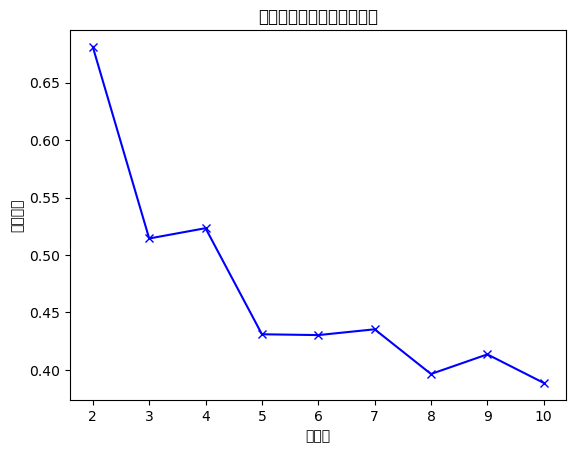

In [37]:
from sklearn.metrics import silhouette_score

# 使用 Silhouette Score 来确定最佳聚类数
silhouette_scores = []

# 遍历不同的聚类数
for k in range(2, 11):
    # kproto = KPrototypes(n_clusters=k, init='Huang', n_init=10, verbose=1)
    kmeans = KMeans(n_clusters=k, random_state=42)
    # clusters = kproto.fit_predict(data_for_clustering, categorical=[0, 1, 2, 3])
    clusters = kmeans.fit_predict(data_for_clustering)
    # 计算轮廓系数
    # numeric_part = data_for_clustering[:, 4:].astype(float)
    numeric_part = data_for_clustering.astype(float)
    score = silhouette_score(numeric_part, clusters)
    silhouette_scores.append(score)

import matplotlib.pyplot as plt
# 绘制 Silhouette Scores 图
plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('聚类数')
plt.ylabel('轮廓系数')
plt.title('轮廓系数来确定最佳聚类数')
plt.show()

In [38]:
# kproto = KPrototypes(n_clusters=3, init='Huang', n_init=10, verbose=1)
# clusters = kproto.fit_predict(data_for_clustering, categorical=[0, 1, 2, 3])

clusters_list = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    clusters = kmeans.fit_predict(data_for_clustering)
    clusters_list.append(clusters.tolist())

clusters_list = np.array(clusters_list)
clusters_list = np.transpose(clusters_list)

# students_df['cluster'] = clusters

c:\Users\QishuoBai\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\QishuoBai\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\QishuoBai\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\QishuoBai\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memor

In [39]:
students_df['cluster'] = clusters_list.tolist()

In [40]:
students_df

,student_ID,class,major,score_bonus,tc_bonus,mem_bonus,_error_type_penalty,_test_num_penalty,explore_bonus,enthusiasm_bonus,rank_bonus,cluster
0,022033910069_dengjiale,Class_022,M033,-1.270643,-1.222851,-1.294599,-1.362134,-1.116272,3.216790,-0.861064,-0.557922,"[1, 1, 1, 1]"
1,123033910065_baiqishuo,Class_123,M033,-1.270643,-1.321047,-1.234391,-1.353829,-1.364229,-0.316847,-1.309454,-0.853994,"[1, 1, 1, 1]"
2,123456789012_Jane,Class_123,M456,0.110111,0.109381,0.244688,-0.412626,-0.263900,9.307165,-0.123885,-0.461432,"[0, 0, 2, 4]"
3,520020910062_fuhaonan,Class_520,M020,0.386262,0.438392,0.411725,0.996410,0.909564,-0.549893,0.163621,-0.058011,"[0, 2, 3, 3]"
4,520021910593_caiyantao,Class_520,M021,0.248186,0.357796,0.277812,0.318190,0.463081,0.786360,-0.744964,-0.786550,"[0, 2, 3, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
469,523120910239_KangYufan,Class_523,M120,0.524337,0.533836,0.480305,0.221302,0.386841,0.543283,0.789904,1.182740,"[0, 0, 0, 3]"
470,523120910240_lihongji,Class_523,M120,0.248186,0.150014,-0.082872,0.168705,0.055439,-0.549893,-0.123459,-0.556762,"[0, 2, 3, 0]"
471,523120910241_libowen,Class_523,M120,0.524337,0.551284,0.503880,0.918899,0.857473,-0.000625,0.477817,0.024561,"[0, 2, 3, 3]"
472,523141910033_zhutianjian,Class_523,M141,-1.684869,-1.669566,-1.654013,-1.735847,-1.745924,-0.461297,-1.548393,-1.061291,"[1, 1, 1, 1]"


c:\Users\QishuoBai\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


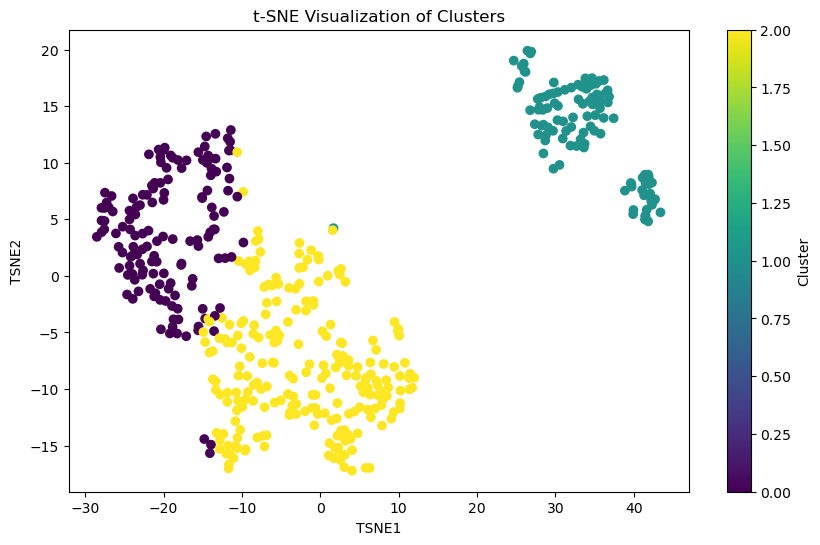

In [45]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
clusters = kmeans.fit_predict(data_for_clustering)

from sklearn.manifold import TSNE

# 进行 PCA 降维到 2 维
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(students_df[students_df.columns[3:-1]])
# 创建一个包含 t-SNE 结果和聚类标签的新 DataFrame
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['cluster'] = clusters

# 可视化 t-SNE 结果
plt.figure(figsize=(10, 6))
scatter = plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=tsne_df['cluster'], cmap='viridis')
plt.colorbar(scatter, label='Cluster')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()

In [46]:
stu_df['cluster'] = students_df['cluster']

In [47]:
stu_df['tsne_x'] = tsne_df['TSNE1']
stu_df['tsne_y'] = tsne_df['TSNE2']

In [48]:
stu_df

,student_ID,class,major,score_bonus,tc_bonus,mem_bonus,_error_type_penalty,_test_num_penalty,explore_bonus,enthusiasm_bonus,rank_bonus,cluster,tsne_x,tsne_y
0,022033910069_dengjiale,Class_022,M033,0.208333,0.192424,0.172547,0.156250,0.264858,0.111119,0.255624,0.185919,"[1, 1, 1, 1]",1.687946,4.221804
1,123033910065_baiqishuo,Class_123,M033,0.208333,0.165571,0.187657,0.158333,0.192006,0.006875,0.130678,0.112822,"[1, 1, 1, 1]",26.781624,19.671087
2,123456789012_Jane,Class_123,M456,0.625000,0.556731,0.558843,0.394444,0.515291,0.290789,0.461044,0.209741,"[0, 0, 2, 4]",-11.412610,12.896953
3,520020910062_fuhaonan,Class_520,M020,0.708333,0.646702,0.600762,0.747917,0.860063,0.000000,0.541159,0.309341,"[0, 2, 3, 3]",-10.062586,-6.396329
4,520021910593_caiyantao,Class_520,M021,0.666667,0.624662,0.567156,0.577778,0.728883,0.039420,0.287976,0.129473,"[0, 2, 3, 0]",2.503528,0.105703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,523120910239_KangYufan,Class_523,M120,0.750000,0.672801,0.617973,0.553472,0.706483,0.032249,0.715677,0.615670,"[0, 0, 0, 3]",-12.135210,1.570096
470,523120910240_lihongji,Class_523,M120,0.666667,0.567843,0.476639,0.540278,0.609115,0.000000,0.461163,0.186205,"[0, 2, 3, 0]",5.038343,-11.613741
471,523120910241_libowen,Class_523,M120,0.750000,0.677573,0.623889,0.728472,0.844758,0.016204,0.628712,0.329728,"[0, 2, 3, 3]",-10.070115,-4.195073
472,523141910033_zhutianjian,Class_523,M141,0.083333,0.070266,0.082349,0.062500,0.079861,0.002614,0.064096,0.061642,"[1, 1, 1, 1]",27.365114,13.411702


In [ ]:
# stu_df.to_csv('./人题数据/stu_features.csv', index=False)

In [49]:
stu_df = pd.read_csv('./人题数据/stu_features.csv')
stu_df

,student_ID,class,major,score_bonus,tc_bonus,mem_bonus,_error_type_penalty,_test_num_penalty,explore_bonus,enthusiasm_bonus,rank_bonus
0,022033910069_dengjiale,Class_022,M033,0.208333,0.192424,0.172547,0.156250,0.264858,0.111119,0.255624,0.185919
1,123033910065_baiqishuo,Class_123,M033,0.208333,0.165571,0.187657,0.158333,0.192006,0.006875,0.130678,0.112822
2,123456789012_Jane,Class_123,M456,0.625000,0.556731,0.558843,0.394444,0.515291,0.290789,0.461044,0.209741
3,520020910062_fuhaonan,Class_520,M020,0.708333,0.646702,0.600762,0.747917,0.860063,0.000000,0.541159,0.309341
4,520021910593_caiyantao,Class_520,M021,0.666667,0.624662,0.567156,0.577778,0.728883,0.039420,0.287976,0.129473
...,...,...,...,...,...,...,...,...,...,...,...
469,523120910239_KangYufan,Class_523,M120,0.750000,0.672801,0.617973,0.553472,0.706483,0.032249,0.715677,0.615670
470,523120910240_lihongji,Class_523,M120,0.666667,0.567843,0.476639,0.540278,0.609115,0.000000,0.461163,0.186205
471,523120910241_libowen,Class_523,M120,0.750000,0.677573,0.623889,0.728472,0.844758,0.016204,0.628712,0.329728
472,523141910033_zhutianjian,Class_523,M141,0.083333,0.070266,0.082349,0.062500,0.079861,0.002614,0.064096,0.061642


In [50]:
json_str = stu_df.to_json(orient='records')
# 指定要保存的 JSON 文件路径
json_file_path = './人题数据/stu_features.json'

# 将 JSON 字符串写入文件
with open(json_file_path, 'w') as json_file:
    json_file.write(json_str)

In [51]:
# 把json中的cluster改为正确的格式
import json

stu_features = json.load(open('./人题数据/stu_features.json', 'r'))
# for stu in stu_features:
#     stu['cluster'] = [int(i) for i in stu['cluster'][1:-1].split(',')]
stu_features

[{'student_ID': '022033910069_dengjiale',
  'class': 'Class_022',
  'major': 'M033',
  'score_bonus': 0.2083333333,
  'tc_bonus': 0.1924236065,
  'mem_bonus': 0.1725469405,
  '_error_type_penalty': 0.15625,
  '_test_num_penalty': 0.2648577413,
  'explore_bonus': 0.1111192196,
  'enthusiasm_bonus': 0.2556243321,
  'rank_bonus': 0.1859185805},
 {'student_ID': '123033910065_baiqishuo',
  'class': 'Class_123',
  'major': 'M033',
  'score_bonus': 0.2083333333,
  'tc_bonus': 0.1655712831,
  'mem_bonus': 0.1876567207,
  '_error_type_penalty': 0.1583333333,
  '_test_num_penalty': 0.1920059744,
  'explore_bonus': 0.006875,
  'enthusiasm_bonus': 0.1306778186,
  'rank_bonus': 0.1128215209},
 {'student_ID': '123456789012_Jane',
  'class': 'Class_123',
  'major': 'M456',
  'score_bonus': 0.625,
  'tc_bonus': 0.5567313748,
  'mem_bonus': 0.5588430859,
  '_error_type_penalty': 0.3944444444,
  '_test_num_penalty': 0.5152907553,
  'explore_bonus': 0.2907885844,
  'enthusiasm_bonus': 0.4610438792,
  'ra

In [52]:
# 把json中的features聚合
for stu in stu_features:
    stu['features'] = {}
    stu['features']['score_bonus'] = stu['score_bonus']
    stu['features']['tc_bonus'] = stu['tc_bonus']
    stu['features']['mem_bonus'] = stu['mem_bonus']
    stu['features']['_error_type_penalty'] = stu['_error_type_penalty']
    stu['features']['_test_num_penalty'] = stu['_test_num_penalty']
    stu['features']['explore_bonus'] = stu['explore_bonus']
    stu['features']['enthusiasm_bonus'] = stu['enthusiasm_bonus']
    stu['features']['rank_bonus'] = stu['rank_bonus']
    del stu['score_bonus']
    del stu['tc_bonus']
    del stu['mem_bonus']
    del stu['_error_type_penalty']
    del stu['_test_num_penalty']
    del stu['explore_bonus']
    del stu['enthusiasm_bonus']
    del stu['rank_bonus']
stu_features

[{'student_ID': '022033910069_dengjiale',
  'class': 'Class_022',
  'major': 'M033',
  'features': {'score_bonus': 0.2083333333,
   'tc_bonus': 0.1924236065,
   'mem_bonus': 0.1725469405,
   '_error_type_penalty': 0.15625,
   '_test_num_penalty': 0.2648577413,
   'explore_bonus': 0.1111192196,
   'enthusiasm_bonus': 0.2556243321,
   'rank_bonus': 0.1859185805}},
 {'student_ID': '123033910065_baiqishuo',
  'class': 'Class_123',
  'major': 'M033',
  'features': {'score_bonus': 0.2083333333,
   'tc_bonus': 0.1655712831,
   'mem_bonus': 0.1876567207,
   '_error_type_penalty': 0.1583333333,
   '_test_num_penalty': 0.1920059744,
   'explore_bonus': 0.006875,
   'enthusiasm_bonus': 0.1306778186,
   'rank_bonus': 0.1128215209}},
 {'student_ID': '123456789012_Jane',
  'class': 'Class_123',
  'major': 'M456',
  'features': {'score_bonus': 0.625,
   'tc_bonus': 0.5567313748,
   'mem_bonus': 0.5588430859,
   '_error_type_penalty': 0.3944444444,
   '_test_num_penalty': 0.5152907553,
   'explore_bon

In [53]:
json.dump(stu_features, open('./人题数据/stu_features.json', 'w'))

#### 计算各个学生在各知识点上的掌握程度

In [54]:
stu_title_features_df = pd.read_csv('./人题数据/stu_title_features.csv')
knowledges = list(set(data_titleInfo['knowledge'].values.tolist()))
knowledges.sort()
sub_knowledges = list(set(data_titleInfo['sub_knowledge'].values.tolist()))
sub_knowledges.sort()
k_dict = {}
sk_dict = {}
for k in knowledges:
    k_dict[k] = []
for sk in sub_knowledges:
    sk_dict[sk] = []

for row_id, row in data_titleInfo.iterrows():
    tid = row['title_ID']
    k = row['knowledge']
    sk = row['sub_knowledge']
    if tid not in k_dict[k]:
        k_dict[k].append(tid)
    if tid not in sk_dict[sk]:
        sk_dict[sk].append(tid)

for k in knowledges:
    k_dict[k].sort()
for sk in sub_knowledges:
    sk_dict[sk].sort()

In [55]:
stu_title_features_df

,title_ID,score,student_ID,score_bonus,tc_bonus,mem_bonus,_error_type_penalty,_test_num_penalty,explore_bonus,enthusiasm_bonus,rank_bonus
0,Question_1088,1,022033910069_dengjiale,0.0,0.000000,0.000000,0.8,0.996124,0.0,0.786564,0.256604
1,Question_1088,1,123033910065_baiqishuo,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
2,Question_1088,1,123456789012_Jane,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
3,Question_1088,1,520020910062_fuhaonan,1.0,0.997639,0.995019,0.8,0.988372,0.0,0.710273,0.516981
4,Question_1088,1,520021910593_caiyantao,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
11371,Question_2244,1,523120910239_KangYufan,1.0,0.999182,0.774529,1.0,1.000000,0.0,0.520448,0.630435
11372,Question_2244,1,523120910240_lihongji,1.0,0.999387,0.748761,1.0,1.000000,0.0,0.339811,0.376812
11373,Question_2244,1,523120910241_libowen,1.0,0.999591,0.773538,1.0,1.000000,0.0,0.426615,0.557971
11374,Question_2244,1,523141910033_zhutianjian,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000


In [56]:
from tqdm import tqdm
for stu in tqdm(stu_features):
    stu['knowledge_score'] = {}
    stu['sub_knowledge_score'] = {}
    # knowledge_score
    filtered_df = stu_title_features_df[stu_title_features_df['student_ID'] == stu['student_ID']]
    for k in knowledges:
        tmp_df = filtered_df[filtered_df['title_ID'].isin(k_dict[k])]
        stu['knowledge_score'][k] = (tmp_df['score'].values * (0.5 * tmp_df['score_bonus'].values + 0.1 * tmp_df['tc_bonus'] + 0.1 * tmp_df['mem_bonus'] + 0.2 * tmp_df['rank_bonus'] + 0.05 * tmp_df['_error_type_penalty'] + 0.05 * tmp_df['_test_num_penalty'])).sum() / tmp_df['score'].sum()
    for sk in sub_knowledges:
        tmp_df = filtered_df[filtered_df['title_ID'].isin(sk_dict[sk])]
        stu['sub_knowledge_score'][sk] = (tmp_df['score'].values * (0.5 * tmp_df['score_bonus'].values + 0.1 * tmp_df['tc_bonus'] + 0.1 * tmp_df['mem_bonus'] + 0.2 * tmp_df['rank_bonus'] + 0.05 * tmp_df['_error_type_penalty'] + 0.05 * tmp_df['_test_num_penalty'])).sum() / tmp_df['score'].sum()

100%|██████████| 474/474 [00:17<00:00, 26.92it/s]


In [57]:
stu_features

[{'student_ID': '022033910069_dengjiale',
  'class': 'Class_022',
  'major': 'M033',
  'features': {'score_bonus': 0.2083333333,
   'tc_bonus': 0.1924236065,
   'mem_bonus': 0.1725469405,
   '_error_type_penalty': 0.15625,
   '_test_num_penalty': 0.2648577413,
   'explore_bonus': 0.1111192196,
   'enthusiasm_bonus': 0.2556243321,
   'rank_bonus': 0.1859185805},
  'knowledge_score': {'Advanced Trees': 0.020833333333333332,
   'Graph': 0.0,
   'Linear Lists': 0.2811828139114725,
   'Priority Queues': 0.0,
   'Search': 0.0,
   'Sort': 0.32592272458973487,
   'Stacks & Queues': 0.6514572667342926,
   'Tree Basics': 0.3118264575943842},
  'sub_knowledge_score': {'Arrays': 0.0,
   'BFS': 0.0,
   'Binary Search': 0.0,
   'DFS': 0.0,
   'Forest': 0.0,
   'Hashing': 0.0,
   'Huffman Tree': 0.0625,
   'Linked Lists': 0.8435484417344175,
   'Priority Queues': 0.0,
   'Queues': 0.5400717622421342,
   'Search Tree': 0.0,
   'Shortest Path': 0.0,
   'Sorting Algorithms': 0.32592272458973487,
   'Sta

In [58]:
json.dump(stu_features, open('./人题数据/stu_features.json', 'w'))

In [59]:
sorted(np.unique(data_studentInfo['student_ID'].values))

['022033910069_dengjiale',
 '123033910065_baiqishuo',
 '123456789012_Jane',
 '520020910062_fuhaonan',
 '520021910593_caiyantao',
 '520021911062_sunyining',
 '520030910083_huangwenxin',
 '520030910209_chenliangyu',
 '520030910297_chilsome',
 '520731910022_lisiyuan',
 '521010910155_xuzheng',
 '521010910157_cuizhaoqi',
 '521021910044_weiyiqi',
 '521021910677_zhangjianyang',
 '521021910779_zhoujinghan',
 '521030910197_liuhaoyuan',
 '521030910223_duyuze',
 '521030910292_liyifan',
 '521030910381_yaobo',
 '521030910382_lijiatong',
 '521030910383_lijianze',
 '521030910387_xuexiangyuan',
 '521030910403_yueqiuxuan',
 '521030910404_gongyushu',
 '521030910411_litianhua',
 '521111910191_lizhuowen',
 '521120910258_lijiaxin',
 '521130910016_zhanglinghe',
 '522030910046_liubingde',
 '522030910163_zhoufangyuan',
 '522031910168_liufengye',
 '522141910016_songsiyuan',
 '522150910056_zhanglin',
 '522150910116_qinchaohao',
 '522434910005_niziyi',
 '522441910001_gaogege',
 '523010910183_jinshihao',
 '523010

In [60]:
# 计算新的人题数据

title_ids = np.unique(data_titleInfo['title_ID'].values).tolist()
title_ids.sort()
stu_ids = np.unique(data_studentInfo['student_ID'].values).tolist()
stu_ids.sort()

In [61]:
# 先统计每个学生每个题目的最好成绩
stu_title_stats = pd.DataFrame(columns=['student_ID', 'title_ID', 'best_score', 'best_tc', 'best_mem', 'submit_num'])

from tqdm import tqdm
for sid in tqdm(stu_ids):
    for tid in title_ids:
        filtered_df = data_submitRecords[(data_submitRecords['student_ID'] == sid) & (data_submitRecords['title_ID'] == tid)]
        if filtered_df.shape[0] == 0:
            cur_row = {}
            cur_row['student_ID'] = sid
            cur_row['title_ID'] = tid
            cur_row['best_score'] = 0
            cur_row['best_tc'] = 0
            cur_row['best_mem'] = 0
            cur_row['submit_num'] = -1
            cur_row = pd.DataFrame([cur_row])
            stu_title_stats = pd.concat([stu_title_stats, cur_row], ignore_index=True)
            continue
        best_score = filtered_df['score'].max()
        best_tc = filtered_df[filtered_df['score'] == best_score]['timeconsume'].min()
        best_mem = filtered_df[filtered_df['score'] == best_score]['memory'].min()
        submit_num = filtered_df.shape[0]
        cur_row = {}
        cur_row['student_ID'] = sid
        cur_row['title_ID'] = tid
        cur_row['best_score'] = best_score
        cur_row['best_tc'] = best_tc
        cur_row['best_mem'] = best_mem
        cur_row['submit_num'] = submit_num
        cur_row = pd.DataFrame([cur_row])
        stu_title_stats = pd.concat([stu_title_stats, cur_row], ignore_index=True)
print(stu_title_stats)

100%|██████████| 474/474 [00:55<00:00,  8.59it/s]

                      student_ID        title_ID best_score best_tc best_mem  \
0         022033910069_dengjiale   Question_1088          0    5316     3904   
1         022033910069_dengjiale  Question_11048          0       0        0   
2         022033910069_dengjiale   Question_1141          0       0        0   
3         022033910069_dengjiale   Question_1142          0       0        0   
4         022033910069_dengjiale   Question_1175          1     252     4640   
...                          ...             ...        ...     ...      ...   
11371  532020910048_lixiangxiang   Question_2218          1      16     3700   
11372  532020910048_lixiangxiang   Question_2230          1      82     3692   
11373  532020910048_lixiangxiang   Question_2232          1     171     3680   
11374  532020910048_lixiangxiang   Question_2243          0       0        0   
11375  532020910048_lixiangxiang   Question_2244          0       0        0   

      submit_num  
0              1  
1

In [62]:
stu_title_stats

,student_ID,title_ID,best_score,best_tc,best_mem,submit_num
0,022033910069_dengjiale,Question_1088,0,5316,3904,1
1,022033910069_dengjiale,Question_11048,0,0,0,-1
2,022033910069_dengjiale,Question_1141,0,0,0,-1
3,022033910069_dengjiale,Question_1142,0,0,0,-1
4,022033910069_dengjiale,Question_1175,1,252,4640,2
...,...,...,...,...,...,...
11371,532020910048_lixiangxiang,Question_2218,1,16,3700,6
11372,532020910048_lixiangxiang,Question_2230,1,82,3692,1
11373,532020910048_lixiangxiang,Question_2232,1,171,3680,6
11374,532020910048_lixiangxiang,Question_2243,0,0,0,-1


In [63]:
# 计算每个学生每个题目的排名
title_ranks = {}
for tid in tqdm(title_ids):
    title_ranks[tid] = {}
    tc_ranks = np.unique(stu_title_stats[stu_title_stats['title_ID'] == tid]['best_tc'].values)
    tc_ranks.sort()
    title_ranks[tid]['tc_ranks'] = tc_ranks.tolist()
    mem_ranks = np.unique(stu_title_stats[stu_title_stats['title_ID'] == tid]['best_mem'].values)
    mem_ranks.sort()
    title_ranks[tid]['mem_ranks'] = mem_ranks.tolist()
    submit_num_ranks = np.unique(stu_title_stats[stu_title_stats['title_ID'] == tid]['submit_num'].values)
    submit_num_ranks.sort()
    title_ranks[tid]['submit_num_ranks'] = submit_num_ranks.tolist()

col_tc_ranks = []
col_mem_ranks = []
col_submit_num_ranks = []
for sid in tqdm(stu_ids):
    for tid in title_ids:
        filtered_df = stu_title_stats[(stu_title_stats['student_ID'] == sid) & (stu_title_stats['title_ID'] == tid)]
        if filtered_df['submit_num'].values[0] == -1:
            col_tc_ranks.append(-1)
            col_mem_ranks.append(-1)
            col_submit_num_ranks.append(-1)
            continue
        tc_rank = title_ranks[tid]['tc_ranks'].index(filtered_df['best_tc'].values[0])
        mem_rank = title_ranks[tid]['mem_ranks'].index(filtered_df['best_mem'].values[0])
        submit_num_rank = title_ranks[tid]['submit_num_ranks'].index(filtered_df['submit_num'].values[0])
        col_tc_ranks.append(tc_rank)
        col_mem_ranks.append(mem_rank)
        col_submit_num_ranks.append(submit_num_rank)

stu_title_stats['tc_rank'] = col_tc_ranks
stu_title_stats['mem_rank'] = col_mem_ranks
stu_title_stats['submit_num_rank'] = col_submit_num_ranks

100%|██████████| 474/474 [00:19<00:00, 24.53it/s]


In [64]:
col_tc_ranks_percent = []
col_mem_ranks_percent = []
col_submit_num_ranks_percent = []
for sid in tqdm(stu_ids):
    for tid in title_ids:
        filtered_df = stu_title_stats[(stu_title_stats['student_ID'] == sid) & (stu_title_stats['title_ID'] == tid)]
        if filtered_df['submit_num'].values[0] == -1:
            col_tc_ranks_percent.append(-1)
            col_mem_ranks_percent.append(-1)
            col_submit_num_ranks_percent.append(-1)
            continue
        tc_rank_percent = filtered_df['tc_rank'].values[0] / (len(title_ranks[tid]['tc_ranks']) - 1)
        mem_rank_percent = filtered_df['mem_rank'].values[0] / (len(title_ranks[tid]['mem_ranks']) - 1)
        submit_num_rank_percent = filtered_df['submit_num_rank'].values[0] / (len(title_ranks[tid]['submit_num_ranks']) - 1)
        col_tc_ranks_percent.append(tc_rank_percent)
        col_mem_ranks_percent.append(mem_rank_percent)
        col_submit_num_ranks_percent.append(submit_num_rank_percent)

stu_title_stats['tc_rank_percent'] = col_tc_ranks_percent
stu_title_stats['mem_rank_percent'] = col_mem_ranks_percent
stu_title_stats['submit_num_rank_percent'] = col_submit_num_ranks_percent

100%|██████████| 474/474 [00:20<00:00, 23.39it/s]


In [65]:
stu_title_stats

,student_ID,title_ID,best_score,best_tc,best_mem,submit_num,tc_rank,mem_rank,submit_num_rank,tc_rank_percent,mem_rank_percent,submit_num_rank_percent
0,022033910069_dengjiale,Question_1088,0,5316,3904,1,86,26,1,0.924731,0.158537,0.043478
1,022033910069_dengjiale,Question_11048,0,0,0,-1,-1,-1,-1,-1.000000,-1.000000,-1.000000
2,022033910069_dengjiale,Question_1141,0,0,0,-1,-1,-1,-1,-1.000000,-1.000000,-1.000000
3,022033910069_dengjiale,Question_1142,0,0,0,-1,-1,-1,-1,-1.000000,-1.000000,-1.000000
4,022033910069_dengjiale,Question_1175,1,252,4640,2,46,61,2,0.464646,0.317708,0.064516
...,...,...,...,...,...,...,...,...,...,...,...,...
11371,532020910048_lixiangxiang,Question_2218,1,16,3700,6,10,30,6,0.285714,0.384615,0.315789
11372,532020910048_lixiangxiang,Question_2230,1,82,3692,1,35,24,1,0.368421,0.187500,0.062500
11373,532020910048_lixiangxiang,Question_2232,1,171,3680,6,34,22,6,0.255639,0.113402,0.260870
11374,532020910048_lixiangxiang,Question_2243,0,0,0,-1,-1,-1,-1,-1.000000,-1.000000,-1.000000


In [66]:
# 转成json

student_view_json = {}
student_view_json['titles'] = data_titleInfo[['title_ID', 'score','knowledge','sub_knowledge']].sort_values(by=['knowledge', 'sub_knowledge']).to_dict(orient='records')

stu_title_stats_json = {}
for sid in stu_ids:
    stu_title_stats_json[sid] = {}
for row_id, row in stu_title_stats.iterrows():
    sid = row['student_ID']
    tid = row['title_ID']
    cur_row = {}
    cur_row['title_ID'] = tid
    cur_row['best_score'] = row['best_score']
    cur_row['best_tc'] = row['best_tc']
    cur_row['best_mem'] = row['best_mem']
    cur_row['submit_num'] = row['submit_num']
    cur_row['tc_rank'] = row['tc_rank']
    cur_row['mem_rank'] = row['mem_rank']
    cur_row['submit_num_rank'] = row['submit_num_rank']
    cur_row['tc_rank_percent'] = row['tc_rank_percent']
    cur_row['mem_rank_percent'] = row['mem_rank_percent']
    cur_row['submit_num_rank_percent'] = row['submit_num_rank_percent']
    stu_title_stats_json[sid][tid] = cur_row

student_view_json['students'] = {}
for sid in stu_ids:
    student_view_json['students'][sid] = []
    for title in student_view_json['titles']:
        student_view_json['students'][sid].append(stu_title_stats_json[sid][title['title_ID']])

In [67]:
knowledges = np.unique(data_titleInfo['knowledge'].values).tolist()
knowledges.sort()
sub_knowledges = np.unique(data_titleInfo['sub_knowledge'].values).tolist()
sub_knowledges.sort()

sk2title = {}
for sk in sub_knowledges:
    sk2title[sk] = np.unique(data_titleInfo[data_titleInfo['sub_knowledge'] == sk]['title_ID'].values).tolist()
k2sk = {}
for k in knowledges:
    k2sk[k] = np.unique(data_titleInfo[data_titleInfo['knowledge'] == k]['sub_knowledge'].values).tolist()
knowledges_json = {}
for k in knowledges:
    knowledges_json[k] = {}
    for sk in k2sk[k]:
        knowledges_json[k][sk] = sk2title[sk]

In [68]:
student_view_json['knowledges'] = knowledges_json

In [69]:
import json
json.dump(student_view_json, open('./人题数据/student_view_data.json', 'w'))

#### 计算 WeekView Data

In [70]:
submits = data_submitRecords.copy()

from datetime import datetime, timedelta
# submits['datetime'] = pd.to_datetime(submits['time'], unit='s', origin='unix').tz_convert('Asia/Shanghai')
# submits['datetime'] = submits.time.apply(lambda x: datetime.fromtimestamp(x))
submits['datetime'] = pd.to_datetime(submits['time'])
submits['datetime'] = submits['datetime'].astype('str').apply(lambda x: x.split(' ')[0])
submits

,index,class,time,state,score,title_ID,method,memory,timeconsume,student_ID,datetime
0,383951,Class_523,2024-02-21 23:01:00,Runtime Error,0,Question_1088,Method_C++,12832,655,523031910726_luliming,2024-02-21
1,383957,Class_523,2024-02-21 23:06:21,Time Limit Exceeded,0,Question_1088,Method_C++,12904,5301,523031910726_luliming,2024-02-21
2,383958,Class_523,2024-02-21 23:07:38,Wrong Answer,0,Question_1088,Method_C++,12908,5298,523031910726_luliming,2024-02-21
3,383962,Class_523,2024-02-21 23:11:14,Time Limit Exceeded,0,Question_1088,Method_C++,13044,5298,523031910726_luliming,2024-02-21
4,383965,Class_523,2024-02-21 23:13:17,Wrong Answer,0,Question_1088,Method_C++,13036,5240,523031910726_luliming,2024-02-21
...,...,...,...,...,...,...,...,...,...,...,...
28384,456733,Class_523,2024-06-18 09:46:56,Accepted,1,Question_1141,Method_C++,13192,1486,523120910228_hanshangxuan,2024-06-18
28385,456792,Class_523,2024-06-19 09:28:39,Accepted,1,Question_2126,Method_C++,3680,10,523030910191_changjiaxin,2024-06-19
28386,456806,Class_523,2024-06-19 16:02:44,Memory Limit Exceeded,0,Question_14290,Method_C++,1568584,8659,523030910177_dengjianbin,2024-06-19
28387,456807,Class_523,2024-06-19 16:21:25,Time Limit Exceeded,0,Question_14290,Method_C++,7348,17501,523030910177_dengjianbin,2024-06-19


In [71]:
# 计算每个日期所在周的周一
def get_week_start(date):
    date = pd.Timestamp(date)
    start_of_week = date - timedelta(days=date.weekday())
    return str(start_of_week).split(' ')[0]

week_starts_col = submits['datetime'].apply(get_week_start).values

In [72]:
week_starts_list = np.unique(week_starts_col)

In [73]:
week_starts_list

array(['2024-02-19', '2024-02-26', '2024-03-04', '2024-03-11',
       '2024-03-18', '2024-03-25', '2024-04-01', '2024-04-08',
       '2024-04-15', '2024-04-22', '2024-04-29', '2024-05-06',
       '2024-05-13', '2024-05-20', '2024-05-27', '2024-06-03',
       '2024-06-10', '2024-06-17'], dtype=object)

In [74]:
week_starts_dict = {}
for i, ws in enumerate(week_starts_list):
    week_starts_dict[ws] = i+1
week_starts_dict

{'2024-02-19': 1,
 '2024-02-26': 2,
 '2024-03-04': 3,
 '2024-03-11': 4,
 '2024-03-18': 5,
 '2024-03-25': 6,
 '2024-04-01': 7,
 '2024-04-08': 8,
 '2024-04-15': 9,
 '2024-04-22': 10,
 '2024-04-29': 11,
 '2024-05-06': 12,
 '2024-05-13': 13,
 '2024-05-20': 14,
 '2024-05-27': 15,
 '2024-06-03': 16,
 '2024-06-10': 17,
 '2024-06-17': 18}

In [ ]:
submits['week'] = week_starts_col
submits.week = submits.week.map(week_starts_dict)

In [76]:
submits

,index,class,time,state,score,title_ID,method,memory,timeconsume,student_ID,datetime,week
0,383951,Class_523,2024-02-21 23:01:00,Runtime Error,0,Question_1088,Method_C++,12832,655,523031910726_luliming,2024-02-21,1
1,383957,Class_523,2024-02-21 23:06:21,Time Limit Exceeded,0,Question_1088,Method_C++,12904,5301,523031910726_luliming,2024-02-21,1
2,383958,Class_523,2024-02-21 23:07:38,Wrong Answer,0,Question_1088,Method_C++,12908,5298,523031910726_luliming,2024-02-21,1
3,383962,Class_523,2024-02-21 23:11:14,Time Limit Exceeded,0,Question_1088,Method_C++,13044,5298,523031910726_luliming,2024-02-21,1
4,383965,Class_523,2024-02-21 23:13:17,Wrong Answer,0,Question_1088,Method_C++,13036,5240,523031910726_luliming,2024-02-21,1
...,...,...,...,...,...,...,...,...,...,...,...,...
28384,456733,Class_523,2024-06-18 09:46:56,Accepted,1,Question_1141,Method_C++,13192,1486,523120910228_hanshangxuan,2024-06-18,18
28385,456792,Class_523,2024-06-19 09:28:39,Accepted,1,Question_2126,Method_C++,3680,10,523030910191_changjiaxin,2024-06-19,18
28386,456806,Class_523,2024-06-19 16:02:44,Memory Limit Exceeded,0,Question_14290,Method_C++,1568584,8659,523030910177_dengjianbin,2024-06-19,18
28387,456807,Class_523,2024-06-19 16:21:25,Time Limit Exceeded,0,Question_14290,Method_C++,7348,17501,523030910177_dengjianbin,2024-06-19,18


In [77]:
submits.to_csv('./Data_SubmitRecord_2024Spring_with_week.csv', index=False)

In [78]:
submits = pd.read_csv('./Data_SubmitRecord_2024Spring_with_week.csv')

# student学号列表
stu_ids = data_studentInfo['student_ID'].values.tolist()
stu_ids = list(set(stu_ids))
stu_ids.sort()
# title题目列表
title_ids = data_titleInfo['title_ID'].values.tolist()
title_ids = list(set(title_ids))
title_ids.sort()

In [79]:
submits.head()

,index,class,time,state,score,title_ID,method,memory,timeconsume,student_ID,datetime,week
0,383951,Class_523,2024-02-21 23:01:00,Runtime Error,0,Question_1088,Method_C++,12832,655,523031910726_luliming,2024-02-21,1
1,383957,Class_523,2024-02-21 23:06:21,Time Limit Exceeded,0,Question_1088,Method_C++,12904,5301,523031910726_luliming,2024-02-21,1
2,383958,Class_523,2024-02-21 23:07:38,Wrong Answer,0,Question_1088,Method_C++,12908,5298,523031910726_luliming,2024-02-21,1
3,383962,Class_523,2024-02-21 23:11:14,Time Limit Exceeded,0,Question_1088,Method_C++,13044,5298,523031910726_luliming,2024-02-21,1
4,383965,Class_523,2024-02-21 23:13:17,Wrong Answer,0,Question_1088,Method_C++,13036,5240,523031910726_luliming,2024-02-21,1


In [80]:
sub_knowledges = list(set(data_titleInfo['sub_knowledge'].values.tolist()))
sub_knowledges.sort()
sk_titles = {}
for sk in sub_knowledges:
    sk_titles[sk] = np.unique(data_titleInfo[data_titleInfo['sub_knowledge'] == sk]['title_ID'].values).tolist()
    sk_titles[sk].sort()

In [81]:
titles2score = {}
for tid in title_ids:
    titles2score[tid] = data_titleInfo[data_titleInfo['title_ID'] == tid]['score'].values[0]

In [82]:
def gen_data_before_week(sid, wk):
    filtered_df = submits[(submits['student_ID'] == sid) & (submits['week'] <= wk)]
    filtered_df.groupby('title_ID')['score'].max().values
    df = pd.DataFrame(columns=['title_ID', 'score', 'best_score'])
    df['title_ID'] = title_ids
    df['score'] = df.title_ID.apply(lambda x: titles2score[x])
    best_score = []
    for tid in title_ids:
        if tid in filtered_df['title_ID'].values:
            best_score.append(filtered_df[filtered_df['title_ID'] == tid]['score'].max() / titles2score[tid])
        else:
            best_score.append(0)
    df['best_score'] = best_score
    rose = []
    for sk in sub_knowledges:
        filtered_df = df[df['title_ID'].isin(sk_titles[sk])]
        rose.append((filtered_df['score'] * filtered_df['best_score']).sum() / filtered_df['score'].sum())
    # print(df)
    return rose


In [84]:
def gen_week_view_data(sid): # 生成某个学生的各周的数据
    cur_student = {}
    cur_student['student_ID'] = sid
    cur_student['roseArr'] = []
    # cur_student['featureArr'] = []
    for i in range(1, 19):
        week_index = i - 1
        rose = gen_data_before_week(sid, i) # rose 和 feature 是纯数字的数组
        cur_student['roseArr'].append({'weekindex':week_index, 'rose': rose})
        # cur_student['featureArr'].append({'weekindex':week_index, 'rose': feature})
    return cur_student


In [85]:
week_view_data = []
from tqdm import tqdm
for sid in tqdm(stu_ids):
    week_view_data.append(gen_week_view_data(sid))

100%|██████████| 474/474 [02:11<00:00,  3.61it/s]


In [86]:
import json
json.dump(week_view_data, open('./人题数据/week_view_data.json', 'w'))

In [87]:
sk2scores = []
for sk in sub_knowledges:
    score = 0
    for tid in sk_titles[sk]:
        score += titles2score[tid]
    sk2scores.append(score)

sk2scores

[2, 1, 2, 1, 2, 1, 1, 1, 3, 2, 1, 1, 3, 1, 2]

In [88]:
for stu in week_view_data:
    for week in stu['roseArr']:
        week['total'] = (np.array(sk2scores) * np.array(week['rose'])).sum() / np.array(sk2scores).sum()

In [89]:
for stu in week_view_data:
    for week in stu['roseArr']:
        if week['weekindex'] == 0:
            week['progress'] = 0
        else:
            week['progress'] = week['total'] - stu['roseArr'][week['weekindex'] - 1]['total']

In [90]:
import json
json.dump(week_view_data, open('./人题数据/week_view_data.json', 'w'))